## `Task` Select best features from from Wine Quality dataset.

* Data Link : https://www.kaggle.com/datasets/rajyellow46/wine-quality

* Drive link : https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv

Note : Follow approach from Feature Selection Session - 2

In [91]:
# Your Code goes Here
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns

wine = pd.read_csv('winequalityN.csv')
wine.shape

(6497, 13)

In [4]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
wine['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [26]:
# Dropping quality 3 and 9 because their count is very less and hence outliers

index_to_drop_3 = wine[(wine['quality'] == 3)].index
index_to_drop_3

Index([ 251,  253,  294,  445,  740,  873, 1034, 1229, 1417, 1484, 1688, 1931,
       2050, 2373, 3087, 3265, 3307, 3409, 3810, 4745, 5357, 5415, 5588, 5730,
       5797, 6197, 6272, 6367, 6376, 6403],
      dtype='int64')

In [27]:
wine.drop(index=index_to_drop_3, inplace=True)

In [29]:
index_to_drop_9 = wine[wine['quality'] == 9].index
index_to_drop_9

Index([774, 820, 827, 876, 1605], dtype='int64')

In [30]:
wine.drop(index=index_to_drop_9, inplace=True)

In [45]:
wine['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
Name: count, dtype: int64

In [31]:
wine['type'].value_counts()

type
white    4873
red      1589
Name: count, dtype: int64

In [32]:
X = wine.drop(columns='quality', axis=1)
y = wine['quality']

In [33]:
X['type'] = pd.get_dummies(X['type'], drop_first=True)

In [34]:
X.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
dtype: int64

In [35]:
from sklearn.impute import SimpleImputer

columns = X.columns

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X = pd.DataFrame(X, columns=columns)

In [36]:
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8
1,1.0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5
2,1.0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1
3,1.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
4,1.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6457,0.0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5
6458,0.0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531381,11.2
6459,0.0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0
6460,0.0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(5169, 12)
(1293, 12)


In [38]:
from sklearn.preprocessing import StandardScaler

stand_scal = StandardScaler()

X_train = stand_scal.fit_transform(X_train)
X_test = stand_scal.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [92]:
# It will take too long to execute
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = LogisticRegression()

sel = EFS(lr, max_features=8, scoring='accuracy', cv=5, n_jobs=-1)

model = sel.fit(X_train, y_train)

Features: 3000/3796IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [93]:
model.best_score_

0.5432415023751969

In [94]:
model.best_feature_names_

('type',
 'volatile acidity',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'alcohol')

In [95]:
# Detailed Output
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.44680851, 0.45647969, 0.4245648 , 0.43617021, 0.44143272]),
  'avg_score': 0.4410911862128109,
  'feature_names': ('type',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.42746615, 0.43520309, 0.42263056, 0.42649903, 0.43272023]),
  'avg_score': 0.42890381435828495,
  'feature_names': ('fixed acidity',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.45357834, 0.48549323, 0.43907157, 0.47001934, 0.46757018]),
  'avg_score': 0.46314653195047006,
  'feature_names': ('volatile acidity',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.43617021, 0.43617021, 0.43520309, 0.43520309, 0.42594385]),
  'avg_score': 0.43373809358856014,
  'feature_names': ('citric acid',)},
 4: {'feature_idx': (4,),
  'cv_scores': array([0.43617021, 0.43617021, 0.43520309, 0.43520309, 0.43368829]),
  'avg_score': 0.43528698032621743,
  'feature_names': ('residual sugar',)},
 5: {'feature_idx': (5,),
  'cv_scores': array([0.45938104, 0.44970986, 0.4361

In [98]:
metric_df = pd.DataFrame(model.get_metric_dict()).T
metric_df.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.44680851063829785, 0.4564796905222437, 0.42...",0.441091,"(type,)",0.013686,0.010648,0.005324
1,"(1,)","[0.4274661508704062, 0.43520309477756286, 0.42...",0.428904,"(fixed acidity,)",0.00579,0.004504,0.002252
2,"(2,)","[0.45357833655706, 0.48549323017408125, 0.4390...",0.463147,"(volatile acidity,)",0.020219,0.015731,0.007866
3,"(3,)","[0.43617021276595747, 0.43617021276595747, 0.4...",0.433738,"(citric acid,)",0.00504,0.003921,0.001961
4,"(4,)","[0.43617021276595747, 0.43617021276595747, 0.4...",0.435287,"(residual sugar,)",0.001168,0.000909,0.000454


In [99]:
metric_df.shape

(3796, 7)

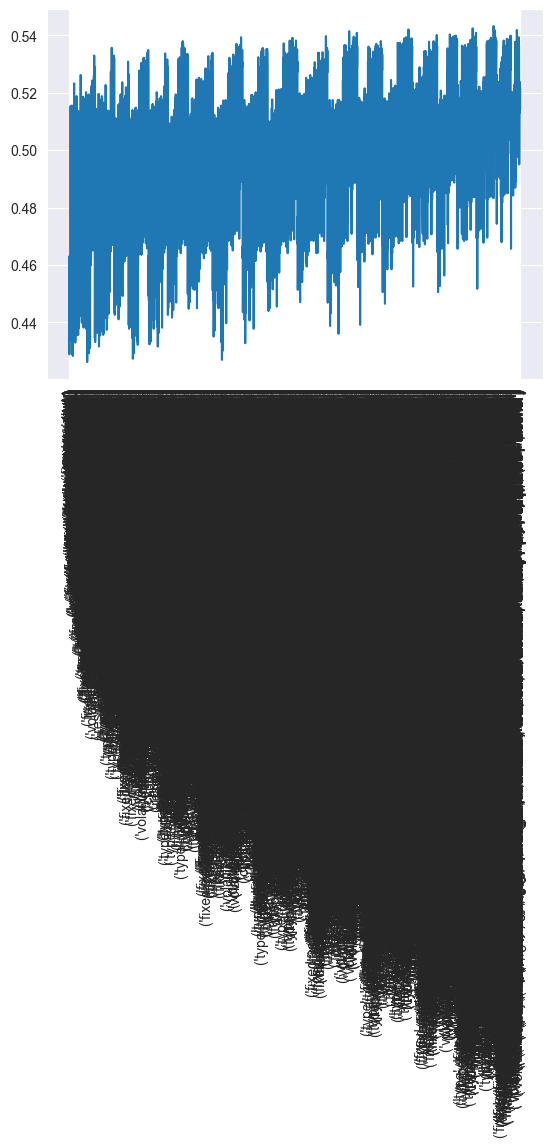

In [97]:
import matplotlib.pyplot as plt

plt.plot([str(k) for k in metric_df['feature_names']], metric_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

## Sequential Forward Elimination

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Create Logistic Regression model with Regularization
model = LogisticRegression(max_iter=1000, C=0.1, solver='lbfgs', random_state=42)

# Cross-validation on training data
print("Training Accuracy:", np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')))
print("Testing Accuracy:", np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')))

Training Accuracy: 0.5391794195794113
Testing Accuracy: 0.56379336146778


In [66]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(model, k_features='best', forward=True, floating=False, scoring='accuracy', cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(C=0.1, max_iter=1000,
                                                       random_state=42),
                          k_features=(1, 12), scoring='accuracy')

In [67]:
sfs.k_feature_idx_

(0, 2, 5, 6, 7, 8, 9, 11)

In [73]:
from sklearn.metrics import accuracy_score

accuracies = []

for idx in metric_df['feature_idx']:
    # print(f"Processing features: {idx}")  # Debugging line
    
    # Ensure idx is a valid index for column selection
    X_train_subset = X_train.iloc[:, list(idx)]  # Convert tuple to list and select columns
    X_test_subset = X_test.iloc[:, list(idx)]    # Convert tuple to list and select columns

    # Check if the subsets are non-empty
    # print(f"Shape of X_train_subset: {X_train_subset.shape}, X_test_subset: {X_test_subset.shape}")
    
    # Train the model
    model.fit(X_train_subset, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_subset)

    # Check if the predictions are correct
    # print(f"Predictions: {y_pred[:5]}")  # Print the first few predictions
    
    # Compute accuracy
    accuracies.append(accuracy_score(y_test, y_pred))

# Check the accuracies
print(f"Accuracies: {accuracies}")

# Add the accuracy scores to the metric_df
metric_df['accuracy'] = accuracies

Accuracies: [0.46326372776488783, 0.43928847641144625, 0.49729311678267596, 0.45166279969064194, 0.45166279969064194, 0.46249033255993816, 0.45166279969064194, 0.45166279969064194, 0.4709976798143852, 0.45166279969064194, 0.45166279969064194, 0.5204949729311679, 0.4593967517401392, 0.4988399071925754, 0.4795050270688322, 0.46326372776488783, 0.4709976798143852, 0.46326372776488783, 0.4694508894044857, 0.46635730858468677, 0.45784996133023975, 0.4795050270688322, 0.5235885537509667, 0.4934261407579273, 0.45552977571539055, 0.44160866202629545, 0.4586233565351895, 0.43928847641144625, 0.4439288476411446, 0.46635730858468677, 0.440061871616396, 0.4462490332559938, 0.5174013921113689, 0.502706883217324, 0.5011600928074246, 0.4934261407579273, 0.5050270688321732, 0.5096674400618716, 0.5158546017014695, 0.5042536736272235, 0.49729311678267596, 0.539829853054911, 0.45011600928074247, 0.4795050270688322, 0.45243619489559167, 0.44934261407579273, 0.46790409899458624, 0.45707656612529, 0.4516627

In [77]:
metric_df.columns

Index(['feature_idx', 'cv_scores', 'avg_score', 'feature_names', 'ci_bound',
       'std_dev', 'std_err', 'accuracy'],
      dtype='object')

In [76]:
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,accuracy
0,"(0,)","[0.4486360998258851, 0.4347069065583285, 0.439...",0.441091,"(type,)",0.012929,0.005745,0.004063,0.463264
1,"(1,)","[0.4341265235055136, 0.4242600116076611, 0.428...",0.429097,"(fixed acidity,)",0.00907,0.00403,0.00285,0.439288
2,"(2,)","[0.4625652930934417, 0.4509576320371445, 0.468...",0.460631,"(volatile acidity,)",0.016289,0.007239,0.005118,0.497293
3,"(3,)","[0.4358676726639582, 0.4358676726639582, 0.434...",0.435481,"(citric acid,)",0.001231,0.000547,0.000387,0.451663
4,"(4,)","[0.4358676726639582, 0.4358676726639582, 0.434...",0.435287,"(residual sugar,)",0.001847,0.000821,0.00058,0.451663
...,...,...,...,...,...,...,...,...
3791,"(3, 4, 5, 6, 8, 9, 10, 11)","[0.502031340684852, 0.5147997678467788, 0.5287...",0.515187,"(citric acid, residual sugar, chlorides, free ...",0.024535,0.010903,0.007709,0.549111
3792,"(3, 4, 5, 7, 8, 9, 10, 11)","[0.5026117237376668, 0.5177016831108532, 0.529...",0.516734,"(citric acid, residual sugar, chlorides, total...",0.025107,0.011157,0.007889,0.546790
3793,"(3, 4, 6, 7, 8, 9, 10, 11)","[0.5107370864770748, 0.5165409170052234, 0.533...",0.52041,"(citric acid, residual sugar, free sulfur diox...",0.022199,0.009865,0.006975,0.542923
3794,"(3, 5, 6, 7, 8, 9, 10, 11)","[0.4985490423679629, 0.5194428322692978, 0.524...",0.514026,"(citric acid, chlorides, free sulfur dioxide, ...",0.024994,0.011107,0.007854,0.546790


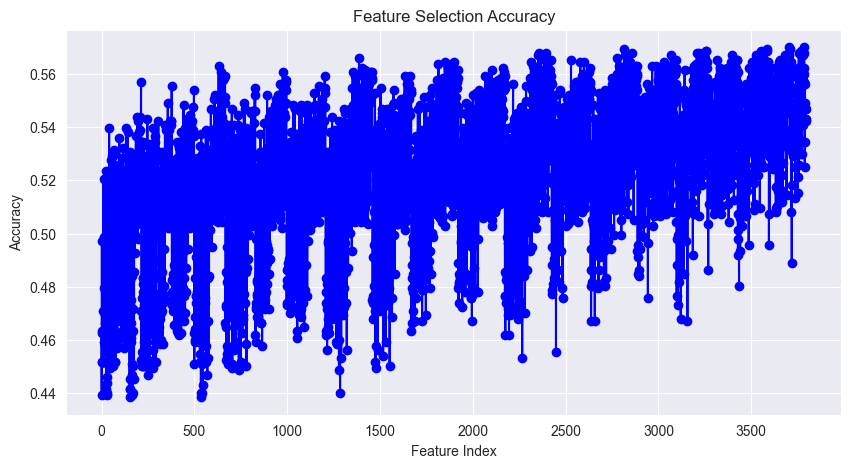

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(metric_df.index, metric_df['accuracy'], marker='o', linestyle='-', color='b')

# Labels and title
plt.xlabel('Feature Index')
plt.ylabel('Accuracy')
plt.title('Feature Selection Accuracy')
plt.grid(True)

# Show plot
plt.show()


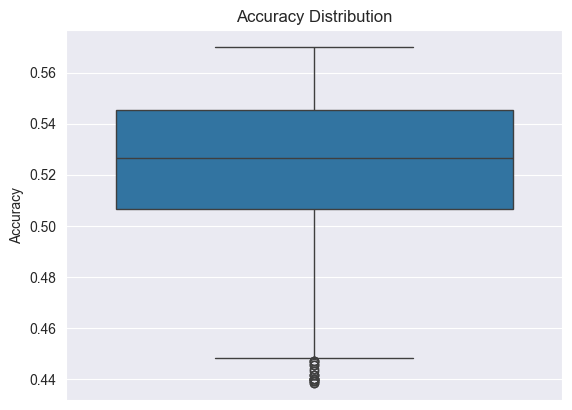

In [81]:
sns.boxplot(y=metric_df['accuracy'])
plt.title("Accuracy Distribution")
plt.ylabel("Accuracy")
plt.show()


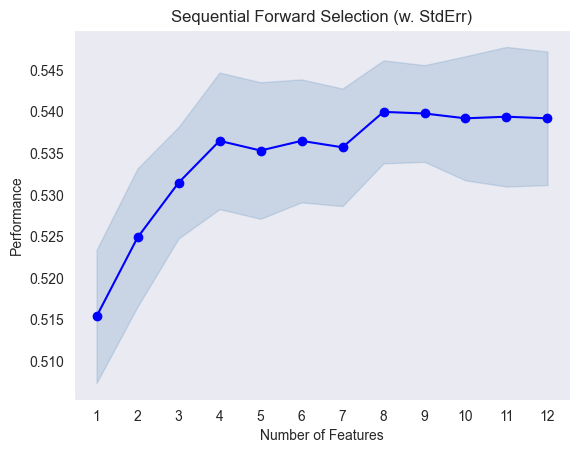

In [74]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

## Sequential Backward Elimination

In [82]:
# Create Logistic Regression model with Regularization
model = LogisticRegression(max_iter=1000, C=0.1, solver='lbfgs', random_state=42)

# Cross-validation on training data
print("Training Accuracy:", np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')))
print("Testing Accuracy:", np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')))

Training Accuracy: 0.5391794195794113
Testing Accuracy: 0.56379336146778


In [83]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(model, k_features='best', forward=False, floating=False, scoring='accuracy', cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(C=0.1, max_iter=1000,
                                                       random_state=42),
                          forward=False, k_features=(1, 12),
                          scoring='accuracy')

In [84]:
sfs.k_feature_idx_

(1, 2, 4, 5, 6, 7, 8, 9, 10, 11)

In [85]:
accuracies = []

for idx in metric_df['feature_idx']:
    # print(f"Processing features: {idx}")  # Debugging line
    
    # Ensure idx is a valid index for column selection
    X_train_subset = X_train.iloc[:, list(idx)]  # Convert tuple to list and select columns
    X_test_subset = X_test.iloc[:, list(idx)]    # Convert tuple to list and select columns

    # Check if the subsets are non-empty
    # print(f"Shape of X_train_subset: {X_train_subset.shape}, X_test_subset: {X_test_subset.shape}")
    
    # Train the model
    model.fit(X_train_subset, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_subset)

    # Check if the predictions are correct
    # print(f"Predictions: {y_pred[:5]}")  # Print the first few predictions
    
    # Compute accuracy
    accuracies.append(accuracy_score(y_test, y_pred))

# Check the accuracies
print(f"Accuracies: {accuracies}")

# Add the accuracy scores to the metric_df
metric_df['accuracy'] = accuracies

Accuracies: [0.46326372776488783, 0.43928847641144625, 0.49729311678267596, 0.45166279969064194, 0.45166279969064194, 0.46249033255993816, 0.45166279969064194, 0.45166279969064194, 0.4709976798143852, 0.45166279969064194, 0.45166279969064194, 0.5204949729311679, 0.4593967517401392, 0.4988399071925754, 0.4795050270688322, 0.46326372776488783, 0.4709976798143852, 0.46326372776488783, 0.4694508894044857, 0.46635730858468677, 0.45784996133023975, 0.4795050270688322, 0.5235885537509667, 0.4934261407579273, 0.45552977571539055, 0.44160866202629545, 0.4586233565351895, 0.43928847641144625, 0.4439288476411446, 0.46635730858468677, 0.440061871616396, 0.4462490332559938, 0.5174013921113689, 0.502706883217324, 0.5011600928074246, 0.4934261407579273, 0.5050270688321732, 0.5096674400618716, 0.5158546017014695, 0.5042536736272235, 0.49729311678267596, 0.539829853054911, 0.45011600928074247, 0.4795050270688322, 0.45243619489559167, 0.44934261407579273, 0.46790409899458624, 0.45707656612529, 0.4516627

In [86]:
metric_df.columns

Index(['feature_idx', 'cv_scores', 'avg_score', 'feature_names', 'ci_bound',
       'std_dev', 'std_err', 'accuracy'],
      dtype='object')

In [87]:
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,accuracy
0,"(0,)","[0.4486360998258851, 0.4347069065583285, 0.439...",0.441091,"(type,)",0.012929,0.005745,0.004063,0.463264
1,"(1,)","[0.4341265235055136, 0.4242600116076611, 0.428...",0.429097,"(fixed acidity,)",0.00907,0.00403,0.00285,0.439288
2,"(2,)","[0.4625652930934417, 0.4509576320371445, 0.468...",0.460631,"(volatile acidity,)",0.016289,0.007239,0.005118,0.497293
3,"(3,)","[0.4358676726639582, 0.4358676726639582, 0.434...",0.435481,"(citric acid,)",0.001231,0.000547,0.000387,0.451663
4,"(4,)","[0.4358676726639582, 0.4358676726639582, 0.434...",0.435287,"(residual sugar,)",0.001847,0.000821,0.00058,0.451663
...,...,...,...,...,...,...,...,...
3791,"(3, 4, 5, 6, 8, 9, 10, 11)","[0.502031340684852, 0.5147997678467788, 0.5287...",0.515187,"(citric acid, residual sugar, chlorides, free ...",0.024535,0.010903,0.007709,0.549111
3792,"(3, 4, 5, 7, 8, 9, 10, 11)","[0.5026117237376668, 0.5177016831108532, 0.529...",0.516734,"(citric acid, residual sugar, chlorides, total...",0.025107,0.011157,0.007889,0.546790
3793,"(3, 4, 6, 7, 8, 9, 10, 11)","[0.5107370864770748, 0.5165409170052234, 0.533...",0.52041,"(citric acid, residual sugar, free sulfur diox...",0.022199,0.009865,0.006975,0.542923
3794,"(3, 5, 6, 7, 8, 9, 10, 11)","[0.4985490423679629, 0.5194428322692978, 0.524...",0.514026,"(citric acid, chlorides, free sulfur dioxide, ...",0.024994,0.011107,0.007854,0.546790


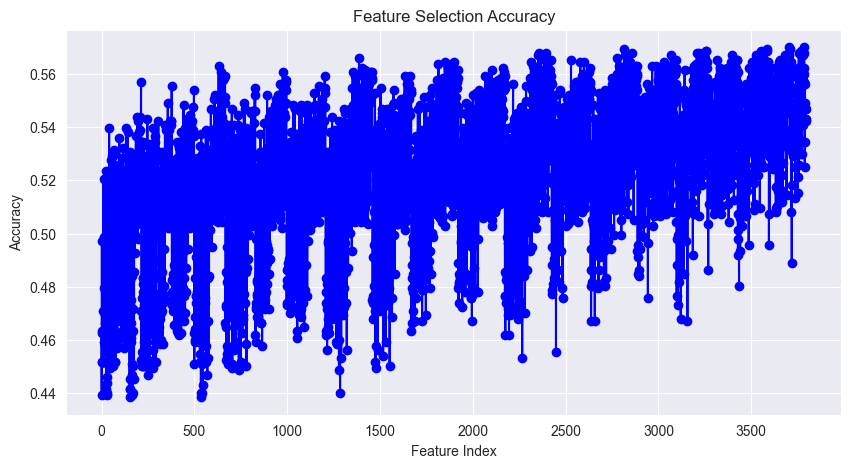

In [88]:
plt.figure(figsize=(10, 5))
plt.plot(metric_df.index, metric_df['accuracy'], marker='o', linestyle='-', color='b')

# Labels and title
plt.xlabel('Feature Index')
plt.ylabel('Accuracy')
plt.title('Feature Selection Accuracy')
plt.grid(True)

# Show plot
plt.show()


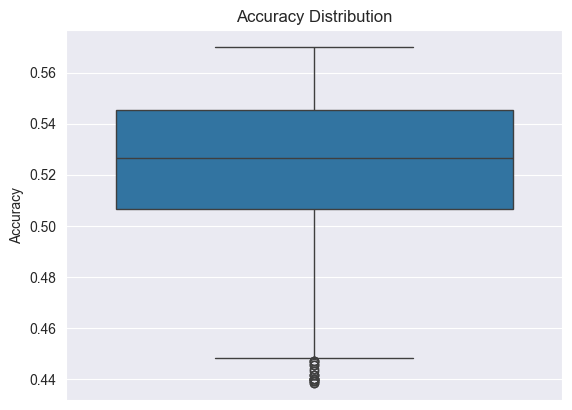

In [89]:
sns.boxplot(y=metric_df['accuracy'])
plt.title("Accuracy Distribution")
plt.ylabel("Accuracy")
plt.show()


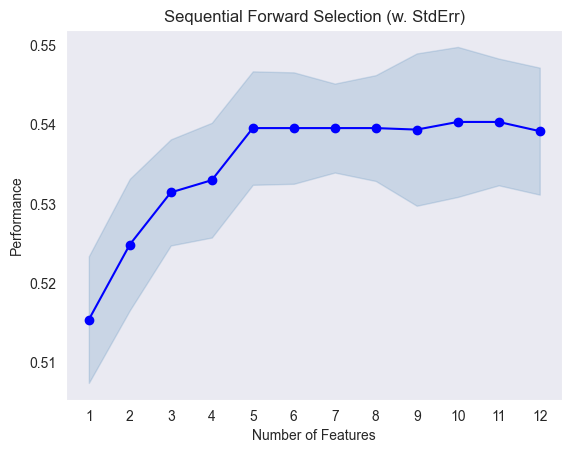

In [90]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()